In [94]:
import scipy.special
import numpy
import matplotlib.pyplot
%matplotlib inline

In [95]:
class NeuralNetwork:
    
    # constructor function
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        # initialize the number of nodes in each layer
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        
        # initialize the random weights between the layers
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # initialize the learning rate
        self.lr = learning_rate
        
        # choose the activation function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # train the network
    def train(self, inputs_list, targets_list): 
        
        # convert list to an array then transpose to a vector
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate hidden node values, then apply activation function
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate final node values, then apply activation function
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error (actual - prediction)
        output_errors = targets - final_outputs
        
        # calculate hidden_errors by calculating error each hidden node contributed
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights between hidden and output
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), 
                                        numpy.transpose(hidden_outputs))
        
        # update the weights between input and hidden
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
                                        numpy.transpose(inputs))
        
        pass
    
    
    # predict network output
    def query(self, inputs_list):
        
        # convert list to an array then transpose to a vector
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate hidden node values, then apply activation function
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate final node values, then apply activation function
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [96]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.2

n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [97]:
#CSV File Location: /Users/Everwitt/Desktop/mnist_train_100.csv

location = "/Users/Everwitt/Desktop/mnist_train_100.csv"
data_file = open(location, "r")
data_list = data_file.readlines()
data_file.close()

len(data_list)

100

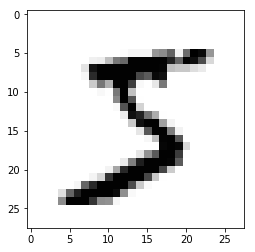

In [98]:
# example of the data we are inputting into the neural network
show_values = data_list[0].split(',')
image_array = numpy.asfarray(show_values[1:]).reshape(28,28)
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [99]:
for record in data_list:
    
    all_values = record.split(',')

    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

    onodes = 10
    targets = numpy.zeros(onodes) + 0.01
    targets[int(record[0])] = 0.99

    n.train(inputs, targets)
    
    pass

In [100]:
# open and load test data file to now predict
test_location = "/Users/Everwitt/Desktop/mnist_test_10.csv"
test_data_file = open(test_location, "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

test_values = test_data_list[0].split(',')
print(test_values[0])

7


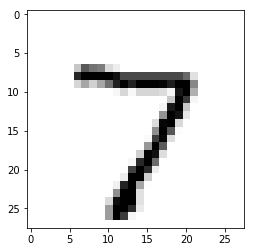

In [101]:
image_array = numpy.asfarray(test_values[1:]).reshape(28,28)
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [102]:
# one prediction to see what the model would predict
n.query((numpy.asfarray(test_values[1:]) / 255.0) * 0.99 + 0.01)

array([[0.10329923],
       [0.01926554],
       [0.08799957],
       [0.03430214],
       [0.03731687],
       [0.04941119],
       [0.00850693],
       [0.83544319],
       [0.08463286],
       [0.02450084]])

In [103]:
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    
    # gets and prints the correct label associated with the image
    correct_label = int(all_values[0])
    
    # predicts the outputs given input and selects the highest value of the output array
    inputs = (numpy.asfarray(all_values[1:]) / 255.0) * 0.99 + 0.01
    outputs = n.query(inputs)
    
    label = numpy.argmax(outputs)
    print("Correct Label is " , correct_label, " The NN predicts ", label)
    
    # append to scorecard if correct prediction
    if(label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass
    

Correct Label is  7  The NN predicts  7
Correct Label is  2  The NN predicts  0
Correct Label is  1  The NN predicts  1
Correct Label is  0  The NN predicts  0
Correct Label is  4  The NN predicts  4
Correct Label is  1  The NN predicts  1
Correct Label is  4  The NN predicts  4
Correct Label is  9  The NN predicts  4
Correct Label is  5  The NN predicts  4
Correct Label is  9  The NN predicts  7


In [104]:
# could get a better scorecard by inputting more data into the traning set
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [105]:
# print the percent accuracy as a measure of performace
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.6


In [107]:
# number of times the training set is iterated through
epochs = 10
for e in range(epochs):
    for record in data_list:
    
        all_values = record.split(',')

        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

        onodes = 10
        targets = numpy.zeros(onodes) + 0.01
        targets[int(record[0])] = 0.99

        n.train(inputs, targets)
        pass
    pass

In [108]:
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    
    # gets and prints the correct label associated with the image
    correct_label = int(all_values[0])
    
    # predicts the outputs given input and selects the highest value of the output array
    inputs = (numpy.asfarray(all_values[1:]) / 255.0) * 0.99 + 0.01
    outputs = n.query(inputs)
    
    label = numpy.argmax(outputs)
    print("Correct Label is " , correct_label, " The NN predicts ", label)
    
    # append to scorecard if correct prediction
    if(label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

# print the scorecard
print(scorecard)

# print the percent accuracy as a measure of performace
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

Correct Label is  7  The NN predicts  7
Correct Label is  2  The NN predicts  2
Correct Label is  1  The NN predicts  1
Correct Label is  0  The NN predicts  0
Correct Label is  4  The NN predicts  4
Correct Label is  1  The NN predicts  1
Correct Label is  4  The NN predicts  9
Correct Label is  9  The NN predicts  4
Correct Label is  5  The NN predicts  4
Correct Label is  9  The NN predicts  9
[1, 1, 1, 1, 1, 1, 0, 0, 0, 1]
performance =  0.7
